#Julio Cesar Flores Molina#
Física aplicada

#Justificación del uso de LSTM y Adam en el modelo#
El modelo utiliza una RNN del tipo LSTM porque, a diferencia de las redes neuronales tradicionales, las LSTM pueden capturar dependencias temporales en secuencias de datos (como precios históricos), gracias a su capacidad de retener información relevante a largo plazo mediante celdas de memoria y puertas. Esto sirve para predecir tendencias en series temporales.

El optimizador Adam se eligió por su eficiencia en el ajuste de parámetros: acelera el aprendizaje y adapta la tasa de aprendizaje por parámetro, lo que lo hace ideal para minimizar el error cuadrático medio (MSE) en problemas no lineales como este.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este conjunto de datos contiene los precios diarios del gas natural desde 1997 hasta 2020 en dolares.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Redes neuronales/Proyecto1/daily_csv.csv', index_col='Date', parse_dates=True)
data.sort_index(inplace=True)

# En este caso sólo trabajamos con la columna 'Price'
series = data[['Price']]

# Limpieza de datos: en caso de encontrar valores no numéricos se reemplazan por NaN
series.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
series = pd.DataFrame(imputer.fit_transform(series), columns=series.columns, index=series.index)

# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(series)




In [ ]:
data.head()

,Price
Date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


In [ ]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))  # Transforma los datos a un rango entre 0 y 1
train_scaled = scaler.fit_transform(series)

# Crear secuencias temporales para el entrenamiento
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_scaled, 60)


In [ ]:
# Definir el modelo LSTM
model = Sequential([
    LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - loss: 0.0077
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - loss: 6.2008e-04
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - loss: 3.3032e-04
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - loss: 5.9626e-04
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - loss: 4.0893e-04
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - loss: 4.0606e-04
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - loss: 4.1822e-04
Epoch 8/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 26s 127ms/step - loss: 3.1096e-04
Epoch 9/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - loss: 3.2466e-04
Epoch 10/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 2.6504e-04
Epoch 11/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 4.3210e-04
Epoch 12/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - loss: 3.3885e-04
Epoch 13/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - loss: 4.1198e-04
Epoch 14/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [ ]:
# Preparar los datos reales de 2021
real_data_2021 = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Redes neuronales/Proyecto1/gas2021.csv',
    index_col='Date',
    parse_dates=True,
    dayfirst=True  # Corrige formato de fecha
)
real_data_2021 = real_data_2021[['Price']]

# Limpieza de datos 2021 (sin reentrenar el imputer/scaler)
real_data_2021.replace(['---', '               ---', 'NaN', '', ' '], np.nan, inplace=True)
real_data_2021 = pd.DataFrame(imputer.transform(real_data_2021), columns=real_data_2021.columns, index=real_data_2021.index)  # Usa el mismo imputer
real_scaled = scaler.transform(real_data_2021)

# Crear secuencias para predicción 2021 (solo datos de 2021)
look_back = 60
X_real, _ = create_dataset(real_scaled, look_back)

# Predicciones
predictions_scaled = model.predict(X_real)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1))

valid_dates = real_data_2021.index[look_back:]
real_prices = real_data_2021.iloc[look_back:, 0]



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


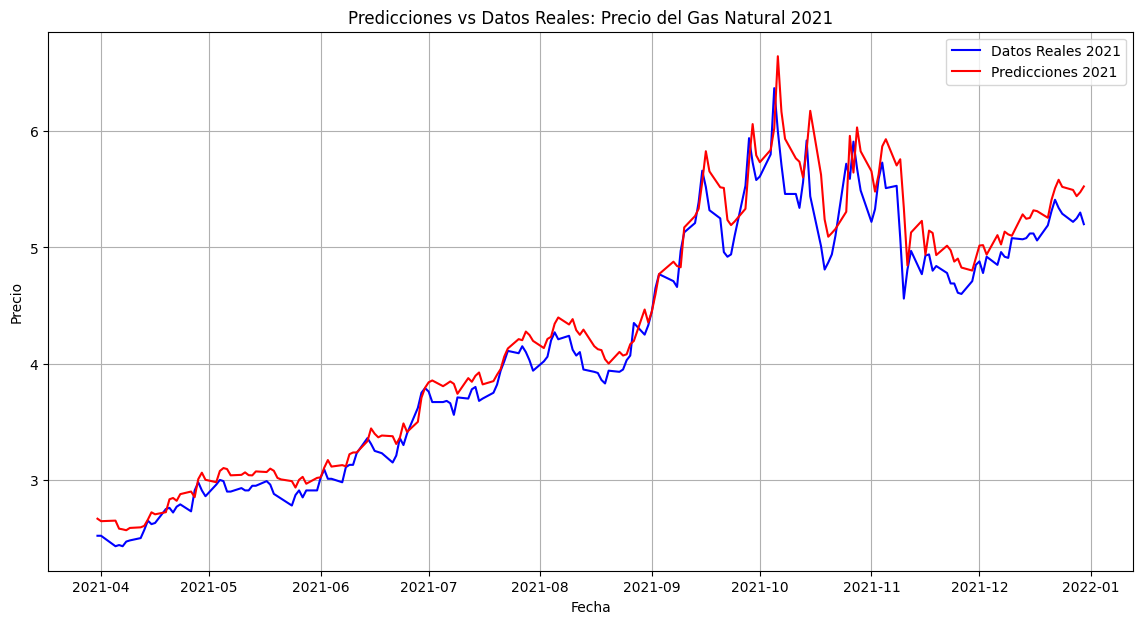

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(valid_dates, real_prices, label='Datos Reales 2021', color='blue')  # Usar valid_dates
plt.plot(valid_dates, predictions, label='Predicciones 2021', color='red')  # Usar valid_dates
plt.title('Predicciones vs Datos Reales: Precio del Gas Natural 2021')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import r2_score

valid_dates = real_data_2021.index[look_back:]
real_prices_series = pd.Series(real_prices, index=valid_dates)
predictions_series = pd.Series(predictions.flatten(), index=valid_dates)

# Calcular R² por mes
r_squared_monthly = []
for month, group in real_prices_series.groupby(real_prices_series.index.month):
    pred_for_month = predictions_series[group.index]
    r_squared = r2_score(group, pred_for_month)
    r_squared_monthly.append((month, r_squared))

# Crear gráfico básico
fig = go.Figure()

# Datos reales
fig.add_trace(go.Scatter(
    x=valid_dates,
    y=real_prices_series,
    mode='lines',
    name='Datos Reales 2021',
    line=dict(color='blue')
))

# Predicciones
fig.add_trace(go.Scatter(
    x=valid_dates,
    y=predictions_series,
    mode='lines',
    name='Predicciones',
    line=dict(color='red')
))


fig.update_layout(
    title='Predicciones vs Real: Precio Gas Natural 2021',
    xaxis_title='Fecha',
    yaxis_title='Precio (USD)'
)

fig.show()

# Imprimir R² mensual
for month, r_squared in r_squared_monthly:
    print(f"R² mes {month}: {r_squared:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



R² mes 3: nan
R² mes 4: 0.5670
R² mes 5: -5.2122
R² mes 6: 0.7443
R² mes 7: 0.2851
R² mes 8: -0.3488
R² mes 9: 0.6653
R² mes 10: 0.0476
R² mes 11: 0.1428
R² mes 12: -0.2187
